In [1]:
%matplotlib inline 

import numpy as np
import scipy
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
from mpl_toolkits.mplot3d import Axes3D #3D plotting
import datetime as dt # module for manipulating dates and times

import requests 
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import binom
from __future__ import division
import re
from StringIO import StringIO
from zipfile import ZipFile 
from pandas import read_csv
from urllib import urlopen
import urllib2
import json

import sklearn
import sklearn.preprocessing
import sklearn.datasets

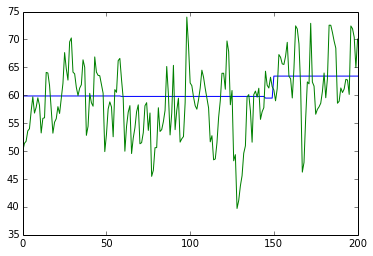

In [15]:
# LMSR Implementation Das Interpretation

iterations = 201
trial = np.zeros(101)

for i in np.arange(0,100,1):
    # Initialize Market Model
    initialValue = np.random.normal(50,12)
    if initialValue < 0:
        initialValue = 0
    if initialValue > 100:
        initialValue = 100

    # shock values
    shock_prob= 1/100
    shockSD = 5
    # true asset value
    trueValue = np.zeros(iterations)
    trueValue[0] = initialValue

    # Initial Trade Values
    traderAlphaExponential = 20
    traderSD = 5
    traderValueAll = np.zeros(iterations)
    traderValueAll[0] = initialValue
    
    #initial MM values
    MMb = 125
    MMquantity = np.zeros(iterations)
    MMquantity[0] = 0
    MMprice = np.zeros(iterations)
    MMprice[0] = 50
    MMrevenue = np.zeros(iterations)
    MMrevenue[0] = 0
    for time in np.arange(1,iterations,1):
        if np.random.binomial(1,shock_prob) == 1:
            initialValue = initialValue + np.random.normal(0, shockSD)
        trueValue[time] = initialValue
        traderValue = np.random.normal(initialValue, traderSD)
        traderValueAll[time] = traderValue
        if traderValue <= 0:
            traderValue = 0.01
        if traderValue > 100:
            traderValue = 99.99
        quantityTrader = np.random.exponential(traderAlphaExponential)
        if traderValue < MMprice[time - 1]:
            quantityTrader = -quantityTrader
        currentquantity = np.sum(MMquantity)
        MMquantity[time] = quantityTrader                                       
        MMrevenue[time] = 100*MMb*(np.log(1+np.exp((currentquantity+quantityTrader)/MMb))- \
                                   np.log(1+np.exp(currentquantity/MMb)))
        normalizedquantity = (quantityTrader + currentquantity)/MMb

        MMprice[time] = 100*(np.exp(normalizedquantity)/(1+np.exp(normalizedquantity)))
    trial[i] = np.sum(MMrevenue)
xs = np.arange(0,iterations,1)
plt.plot(xs, trueValue, xs, MMprice)

816.612993477
4144.42114017
-6998.12337555


(array([  4.,  17.,  21.,  21.,  18.,   8.,   5.,   3.,   3.,   1.]),
 array([ -6998.12337555,  -4853.45422603,  -2708.7850765 ,   -564.11592698,
          1580.55322255,   3725.22237207,   5869.8915216 ,   8014.56067112,
         10159.22982065,  12303.89897017,  14448.56811969]),
 <a list of 10 Patch objects>)

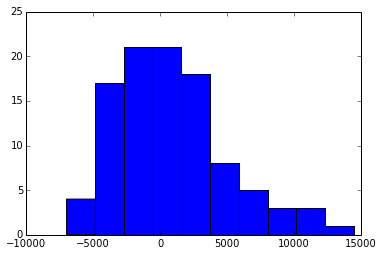

In [3]:
# Revenue Results 
print(np.average(trial))
print(np.std(trial))
print(np.min(trial))
plt.hist(trial)

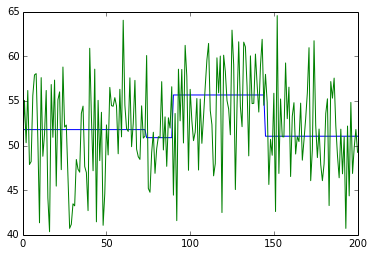

In [13]:
# LMSR Implementation Textbook Interpretation
iterations = 201
trial = np.zeros(101)

for i in np.arange(0,100,1):
    # Initialize Market Model
    initialValue = np.random.normal(50,12)
    if initialValue < 0:
        initialValue = 0
    if initialValue > 100:
        initialValue = 100

    # shock values
    shock_prob= 1/100
    shockSD = 5
    # true asset value
    trueValue = np.zeros(iterations)
    trueValue[0] = initialValue

    # Initial Trade Values
    traderAlphaExponential = 20
    traderSD = 5
    traderValueAll = np.zeros(iterations)
    traderValueAll[0] = initialValue
    
    #initial MM values
    MMb = 125
    MMquantity = np.zeros(iterations)
    MMquantity[0] = 0
    MMprice = np.zeros(iterations)
    MMprice[0] = 50
    MMrevenue = np.zeros(iterations)
    MMrevenue[0] = 0
    alpha = 0.5
    
    for time in np.arange(1,iterations,1):
        if np.random.binomial(1,shock_prob) == 1:
            initialValue = initialValue + np.random.normal(0, shockSD)
        trueValue[time] = initialValue
        traderValue = np.random.normal(initialValue, traderSD)
        traderValueAll[time] = traderValue
        if traderValue <= 0:
            traderValue = 0.01
        if traderValue >= 100:
            traderValue = 99.99   
        # will trade till the instantaneous price is equal to trader's value 
        currentquantity = np.sum(MMquantity) 
        quantityTrader = np.log((traderValue/100)/(1-(traderValue/100)))*MMb-currentquantity
        MMquantity[time] = quantityTrader
        MMrevenue[time] = 100*MMb*(np.log(1+np.exp((currentquantity+quantityTrader)/MMb))- \
                                   np.log(1+np.exp(currentquantity/MMb)))
        normalizedquantity = (quantityTrader + currentquantity)/MMb
        MMprice[time] = 100*(np.exp(normalizedquantity)/(1+np.exp(normalizedquantity)))
    trial[i] = np.sum(MMrevenue)
xs = np.arange(0,iterations,1)
plt.plot(xs, trueValue, xs, MMprice)


441.729208265
3581.28592271
-6454.66946868


(array([  9.,  10.,  19.,  23.,  18.,  13.,   4.,   2.,   2.,   1.]),
 array([ -6454.66946868,  -4553.57483009,  -2652.48019149,   -751.3855529 ,
          1149.70908569,   3050.80372429,   4951.89836288,   6852.99300147,
          8754.08764007,  10655.18227866,  12556.27691726]),
 <a list of 10 Patch objects>)

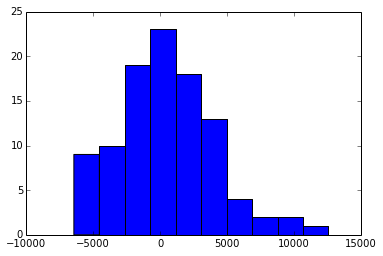

In [11]:
print(np.average(trial))
print(np.std(trial))
print(np.min(trial))
plt.hist(trial)

In [ ]:
#Liquidity Sensitive LMSR Implementation Das Interpretation

iterations = 201
trial = np.zeros(101)

for i in np.arange(0,100,1):
    # Initialize Market Model
    initialValue = np.random.normal(50,12)
    if initialValue < 0:
        initialValue = 0
    if initialValue > 100:
        initialValue = 100

    # shock values
    shock_prob= 1/100
    shockSD = 5
    # true asset value
    trueValue = np.zeros(iterations)
    trueValue[0] = initialValue

    # Initial Trade Values
    traderAlphaExponential = 20
    traderSD = 5
    traderValueAll = np.zeros(iterations)
    traderValueAll[0] = initialValue
    
    #initial MM values
    MMquantity = np.zeros(iterations)
    MMquantity[0] = 0
    MMprice = np.zeros(iterations)
    MMprice[0] = 50
    MMrevenue = np.zeros(iterations)
    MMrevenue[0] = 0
    for time in np.arange(1,iterations,1):
        if np.random.binomial(1,shock_prob) == 1:
            initialValue = initialValue + np.random.normal(0, shockSD)
        trueValue[time] = initialValue
        traderValue = np.random.normal(initialValue, traderSD)
        traderValueAll[time] = traderValue
        if traderValue <= 0:
            traderValue = 0.01
        if traderValue > 100:
            traderValue = 99.99
        quantityTrader = np.random.exponential(traderAlphaExponential)
        if traderValue < MMprice[time - 1]:
            quantityTrader = -quantityTrader
        currentquantity = np.sum(MMquantity)
        MMb = alpha*currentquantity
        MMquantity[time] = quantityTrader                                       
        MMrevenue[time] = 100*MMb*(np.log(1+np.exp((currentquantity+quantityTrader)/MMb))- \
                                   np.log(1+np.exp(currentquantity/MMb)))
        normalizedquantity = (quantityTrader + currentquantity)/MMb
        MMprice[time] = 100*(alpha*np.log(1+np.exp((currentquantity+quantityTrader)/MMb))
    trial[i] = np.sum(MMrevenue)
xs = np.arange(0,iterations,1)
plt.plot(xs, trueValue, xs, MMprice)

In [25]:
 quantityTrader = np.random.exponential(traderAlphaExponential)